In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
sns.set(style="whitegrid")


In [19]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Show first few rows of each dataset to understand the structure
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity   
0        T00001      C0199      P067  2024-08-25 12:38:23         1  \
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [20]:
# Check for missing values in each dataset
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

# Check for duplicates
print(customers_df.duplicated().sum())
print(products_df.duplicated().sum())
print(transactions_df.duplicated().sum())

# Convert 'SignupDate' and 'TransactionDate' to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [32]:
# Descriptive statistics for numerical columns
print(products_df.describe())  # For Products.csv (Price)

transactions_df_description = pd.read_csv('Transactions.csv')
transactions_df_description.drop(columns=['TransactionDate']).describe()
print(transactions_df_description.describe())  # For Transactions.csv (Quantity, TotalValue, Price)


            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


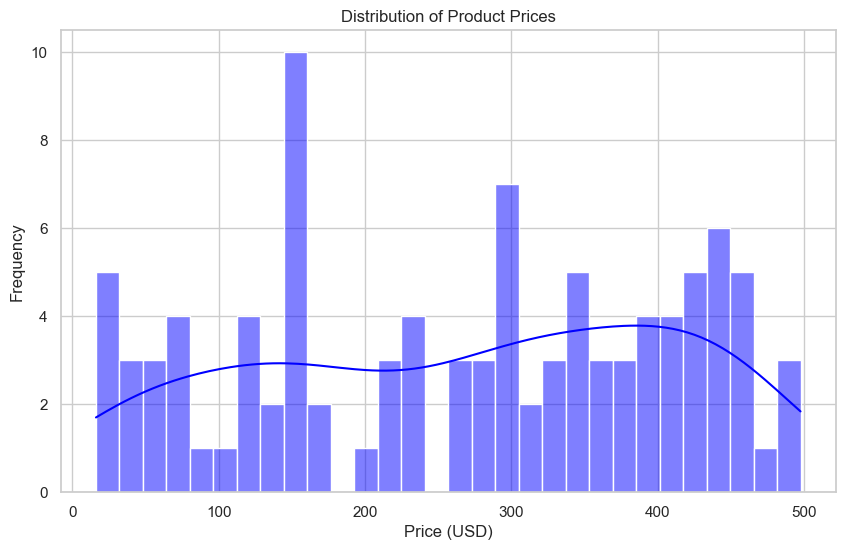

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


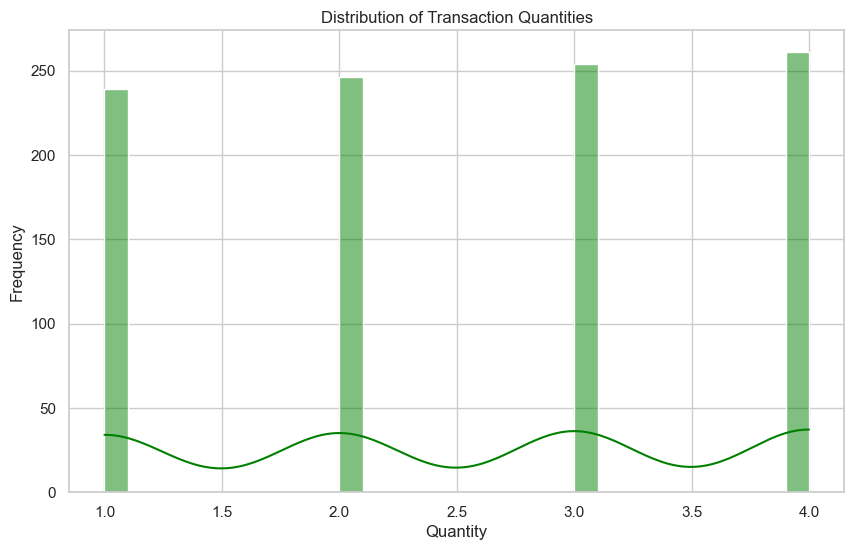

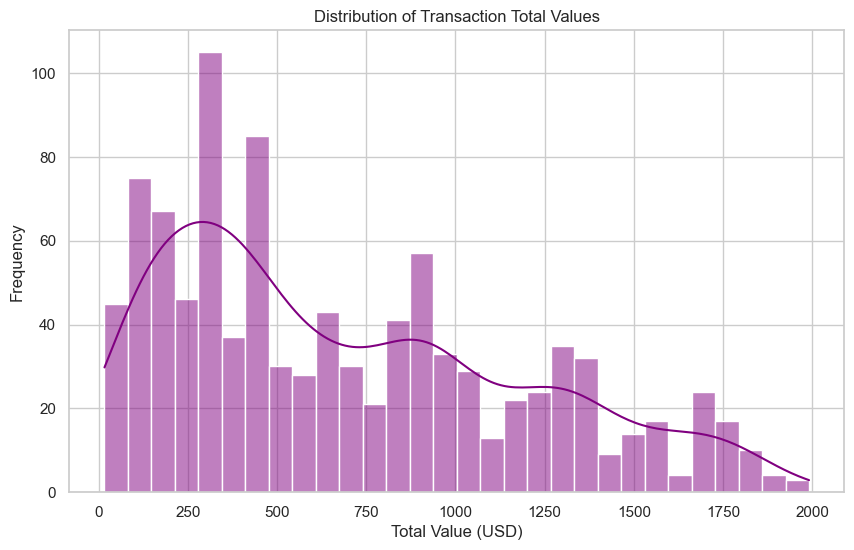

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['Quantity'], kde=True, bins=30, color='green')
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], kde=True, bins=30, color='purple')
plt.title('Distribution of Transaction Total Values')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()


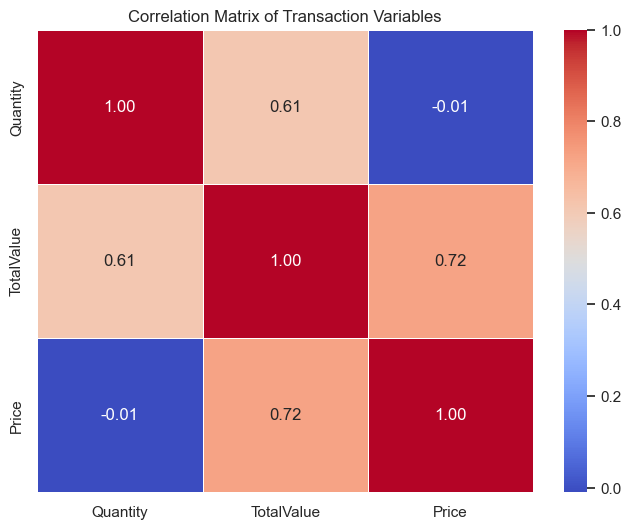

In [24]:
# Correlation matrix for numerical columns in transactions dataset
correlation_matrix = transactions_df[['Quantity', 'TotalValue', 'Price']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Transaction Variables')
plt.show()


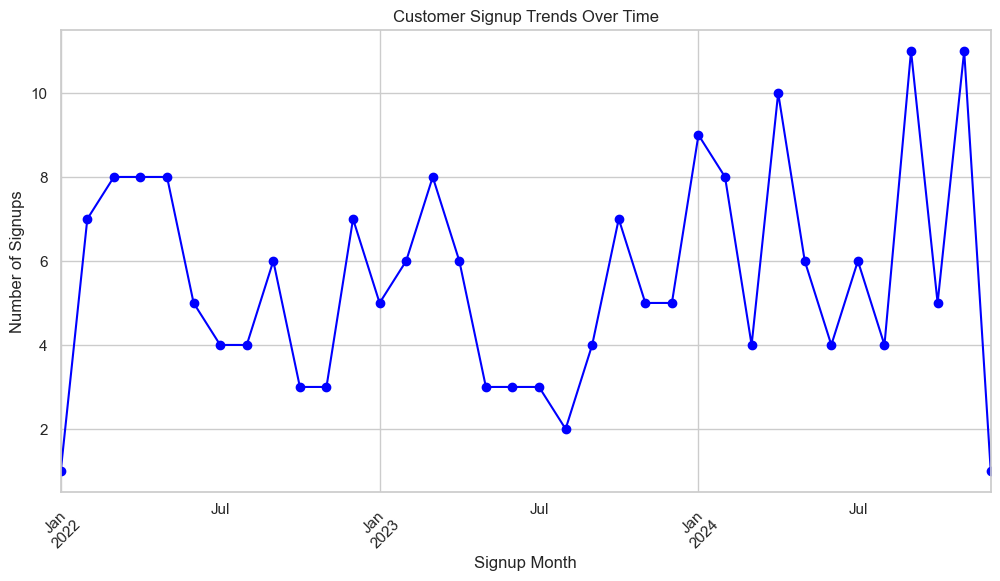

In [25]:
# Group by month and year for customer signups
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
signup_trends = customers_df.groupby('SignupMonth').size()

# Plot signup trends over time
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='blue')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

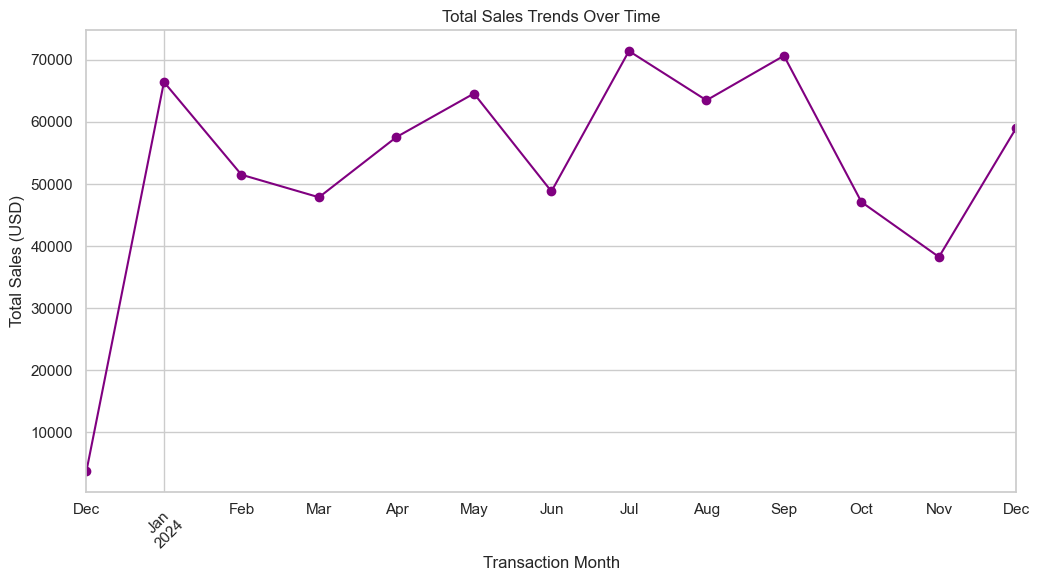

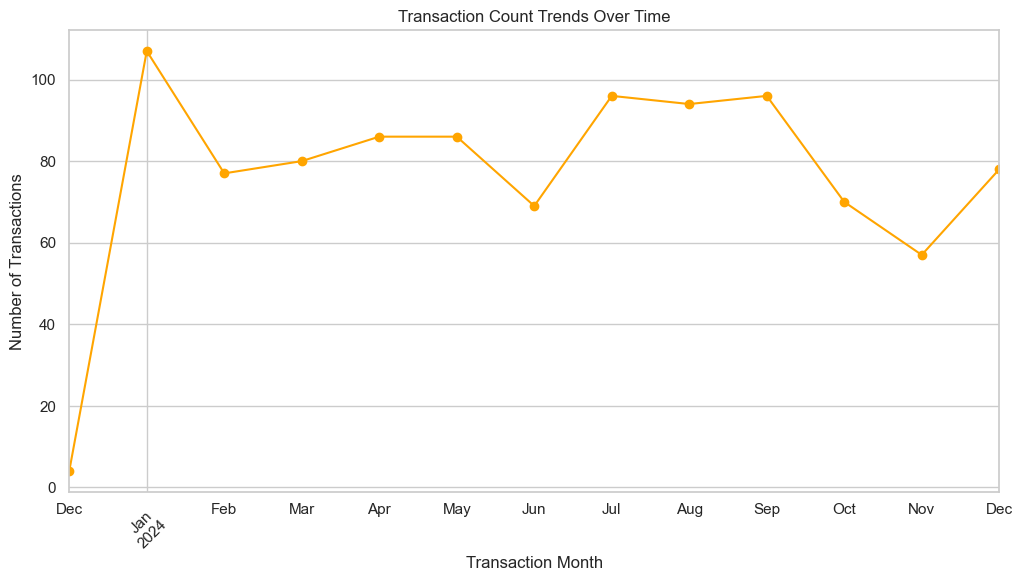

In [26]:
# Group by month and year for transactions
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
transaction_trends = transactions_df.groupby('TransactionMonth').agg(
    total_sales=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count')
)

# Plot total sales over time
plt.figure(figsize=(12, 6))
transaction_trends['total_sales'].plot(kind='line', marker='o', color='purple')
plt.title('Total Sales Trends Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot transaction count over time
plt.figure(figsize=(12, 6))
transaction_trends['transaction_count'].plot(kind='line', marker='o', color='orange')
plt.title('Transaction Count Trends Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


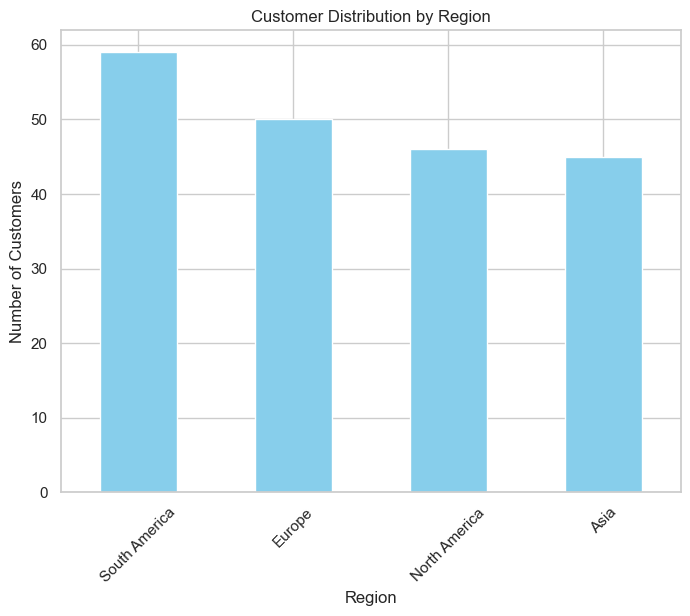

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [35]:
region_counts = customers_df['Region'].value_counts()

plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

print(region_counts)


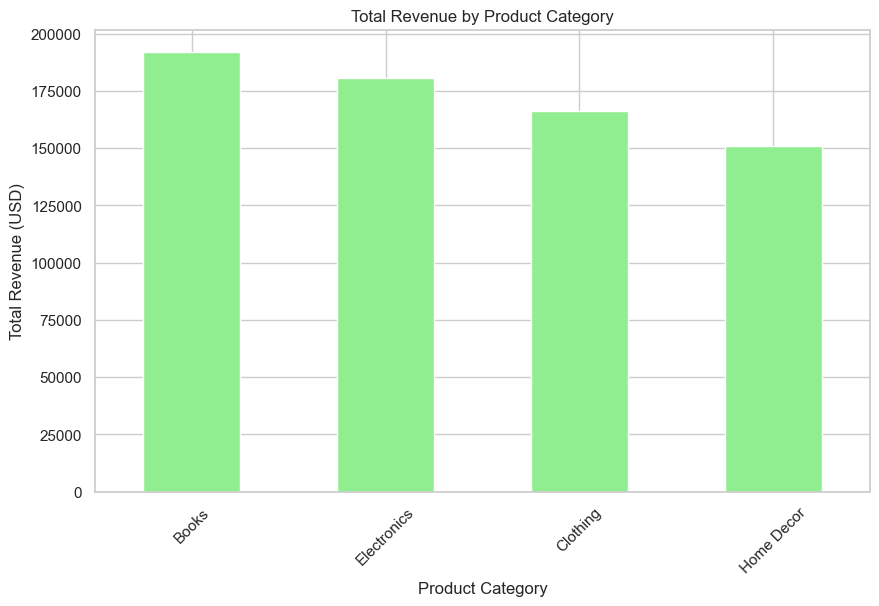

             total_revenue  total_quantity
Category                                  
Books            192147.47             681
Electronics      180783.50             627
Clothing         166170.66             590
Home Decor       150893.93             639


In [36]:
# Merge Products and Transactions data
product_sales = transactions_df.merge(products_df, on='ProductID')
category_sales = product_sales.groupby('Category').agg(
    total_revenue=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum')
).sort_values(by='total_revenue', ascending=False)

# Plot total revenue by product category
plt.figure(figsize=(10, 6))
category_sales['total_revenue'].plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

print(category_sales)


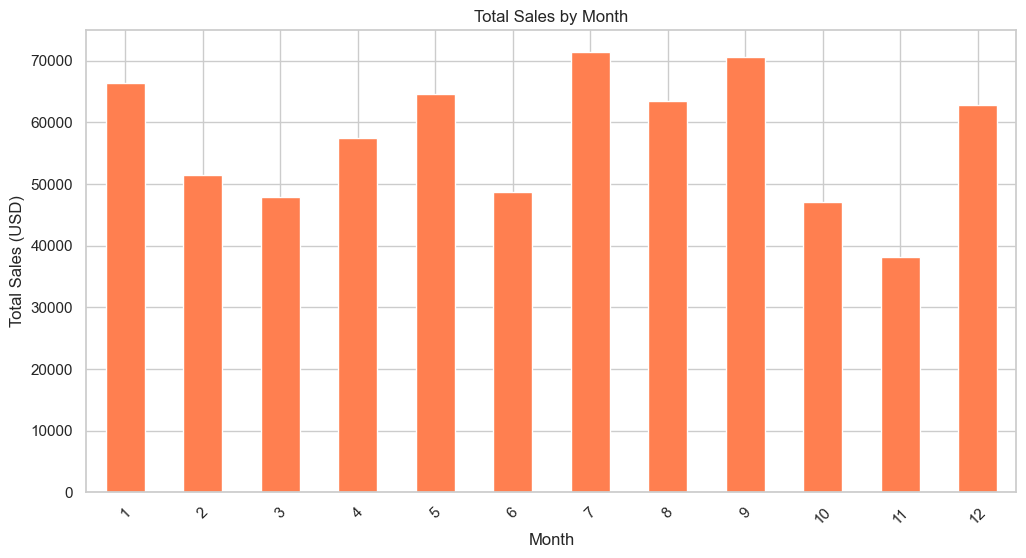

                  total_sales  transaction_count
TransactionMonth                                
1                    66376.39                107
2                    51459.27                 77
3                    47828.73                 80
4                    57519.06                 86
5                    64527.74                 86
6                    48771.18                 69
7                    71366.39                 96
8                    63436.74                 94
9                    70603.75                 96
10                   47063.22                 70
11                   38224.37                 57
12                   62818.72                 82


In [37]:
# Extract month from 'TransactionDate'
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.month
monthly_sales = transactions_df.groupby('TransactionMonth').agg(
    total_sales=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count')
)

# Plot total sales by month
plt.figure(figsize=(12, 6))
monthly_sales['total_sales'].plot(kind='bar', color='coral')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

print(monthly_sales)


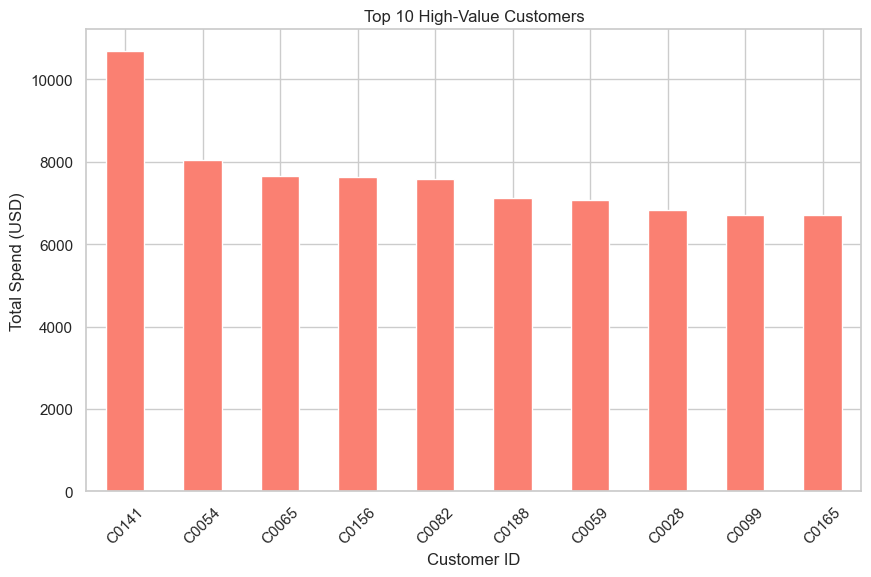

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [38]:
# Calculate total value spent by each customer
customer_spend = transactions_df.groupby('CustomerID')['TotalValue'].sum()

# Find top 10 high-value customers
top_customers = customer_spend.sort_values(ascending=False).head(10)

# Plot high-value customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='salmon')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend (USD)')
plt.xticks(rotation=45)
plt.show()

print(top_customers)


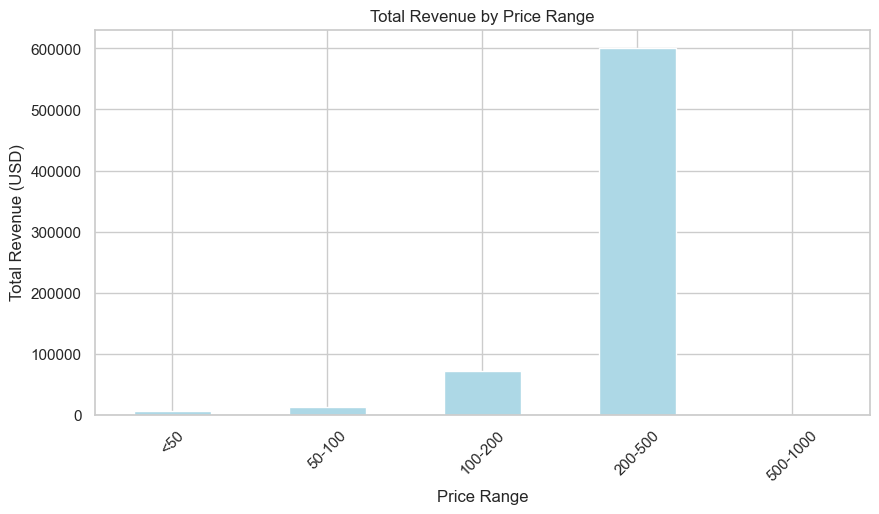

  PriceRange  total_revenue  total_quantity
0        <50        6401.58             195
1     50-100       11941.47             183
2    100-200       70879.67             492
3    200-500      600772.84            1667
4   500-1000           0.00               0


In [43]:
# Price ranges for products
price_bins = [0, 50, 100, 200, 500, 1000]
price_labels = ['<50', '50-100', '100-200', '200-500', '500-1000']
products_df['PriceRange'] = pd.cut(products_df['Price'], bins=price_bins, labels=price_labels)

# Merge transactions with products to analyze price range sensitivity
transactions_with_products = pd.merge(transactions_df, products_df, on='ProductID')

# Group by PriceRange and aggregate total revenue and quantity
product_sales_price_range = transactions_with_products.groupby('PriceRange').agg(
    total_revenue=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

# Plot total revenue by price range
plt.figure(figsize=(10, 5))
product_sales_price_range.set_index('PriceRange')['total_revenue'].plot(kind='bar', color='lightblue')
plt.title('Total Revenue by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

print(product_sales_price_range)